## <center>Методи та технології аналітики даних</center>
## <center>Лабораторна робота №6</center>
#### <center>ФБ-25 Кравченко Максим</center>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [58]:
file_name = r'..\Dataset\adult_cleaned.data'
headers = ['Age', 'Work_class', 'Final_weight', 'Education', 'Education_num', 'Marital_status',
           'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
           'Hours_per_week', 'Native_country', 'Income']
df = pd.read_csv(file_name, sep=",", header=1, names=headers, na_values='?')
df

,Age,Work_class,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
1,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
2,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
3,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
4,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30155,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30156,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30157,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Перетворення категоріальних даних в числові

In [59]:
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)

In [60]:
X = df[['Age', 'Education_num', 'Capital_gain', 'Capital_loss']]
y = df['Hours_per_week']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

print(f"Середньо-квадратична похибка (Test): {mse_test:.2f}")
print(f"Середньо-квадратична похибка (Train): {mse_train:.2f}")

Середньо-квадратична похибка (Test): 131.71
Середньо-квадратична похибка (Train): 139.86


• намалювати лінію регресії

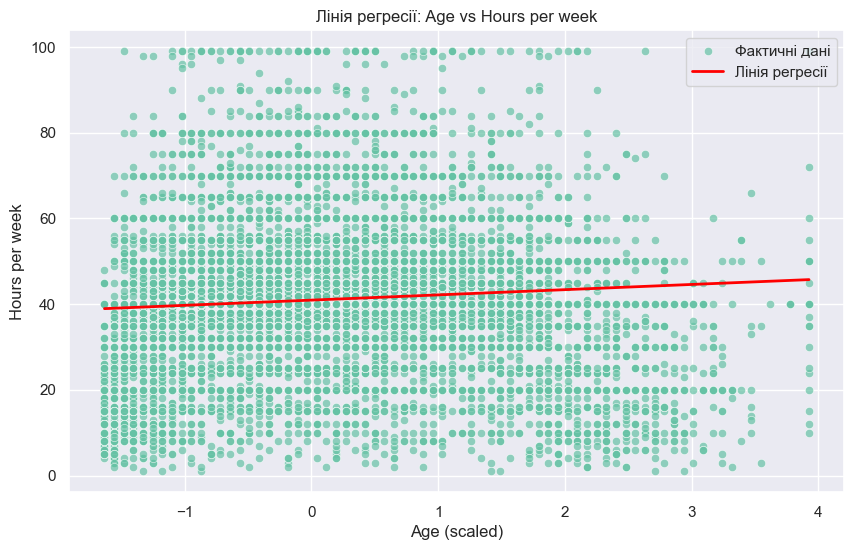

In [74]:
X_age = X_scaled[:, 0]
X_age_reshaped = X_age.reshape(-1, 1)

model_age = LinearRegression()
model_age.fit(X_age_reshaped, y)

y_pred_age = model_age.predict(X_age_reshaped)

sorted_indices = np.argsort(X_age)
X_age_sorted = X_age[sorted_indices]
y_pred_sorted = y_pred_age[sorted_indices]

sns.set_theme(style='darkgrid')
pallette = sns.color_palette("Set2")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=X_age, y=y, alpha=0.7, label='Фактичні дані', color=pallette[0])
plt.plot(X_age_sorted, y_pred_sorted, color='red', linewidth=2, label='Лінія регресії')

plt.title('Лінія регресії: Age vs Hours per week')
plt.xlabel('Age (scaled)')
plt.ylabel('Hours per week')
plt.legend()
plt.grid(True)
plt.show()

• написати рівняння множинної регресії

In [76]:
intercept = model_age.intercept_
coef = model_age.coef_[0]
coefs = model.coef_

equation = f"y = {coef:.2f}x + {intercept:.2f}"
print(f"Рівняння прямої: {equation}")

print("Підсумкове рівняння регресії:")
equation_full = f"y = {intercept:.2f}"
for i, (coef, feature) in enumerate(zip(coefs, X.columns)):
    equation_full += f" + ({coef:.2f} * {feature})"
print(equation_full)

Рівняння прямої: y = 1.22x + 40.93
Підсумкове рівняння регресії:
y = 40.93 + (0.08 * Age) + (0.65 * Education_num) + (0.00 * Capital_gain) + (0.00 * Capital_loss)


In [79]:
forecast_steps = 3
predictions = []
current_input = X.iloc[-1].values.reshape(1, -1)

for step in range(forecast_steps):
    next_pred = model.predict(current_input)
    predictions.append(next_pred[0])
    current_input = np.append(current_input[:, 1:], next_pred.reshape(1, -1), axis=1)

predictions = [float(pred) for pred in predictions]

actual_values = y[-forecast_steps:].values
mse_forecast = mean_squared_error(actual_values, predictions)

print(f"Прогноз на 3 кроки вперед: {predictions}")

Прогноз на 3 кроки вперед: [10201.757376141299, 29985.801998946194, 37633.38125006269]


• порахувати показники: RSS, RMSE, RSE, R^2, t_b. На їх основі оцінити регресію

In [64]:
model.fit(X, y)

y_pred = model.predict(X)

RSS = np.sum((y - model.predict(X)) ** 2)
RMSE = np.sqrt(mean_squared_error(y, model.predict(X)))
TSS = np.sum((y - np.mean(y)) ** 2)
R2 = 1 - (RSS / TSS)
n = len(y)
k = X.shape[1]
RSE = np.sqrt(RSS / (n - k - 1))

X_with_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_const).fit()
t_b = model_sm.tvalues

print(f"RSS: {RSS:.4f}")
print(f"RMSE: {RMSE:.4f}")
print(f"RSE: {RSE:.4f}")
print(f"R^2: {R2:.4f}")
print(f"t-статистика для коефіцієнтів:\n{t_b}")

RSS: 4168757.2340
RMSE: 11.7570
RSE: 11.7579
R^2: 0.0368
t-статистика для коефіцієнтів:
const            92.132202
Age              15.619616
Education_num    24.240305
Capital_gain     10.016892
Capital_loss      6.659982
dtype: float64
